# Import Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 


# Load Dataset

In [20]:
df = pd.read_csv('../data/cardio.csv')

# Split the Data into feature data and target data

In [21]:
y = df['cardio']
x=df.drop(columns='cardio')

In [22]:
#df.columns

# Modelling 

 Splitting data into 75% training data and 25% test data 

In [23]:
#Split data in 75% training data and 25% test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1)


# Feature Standization

In [24]:
#To standardize the features...

from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std.fit(x_train)
std.transform(x_test)

array([[-1.40622524, -1.3630344 , -0.73462899, ..., -0.31243322,
        -0.23931996,  0.49648558],
       [ 0.71822501, -2.03605939, -0.73462899, ..., -0.31243322,
        -0.23931996,  0.49648558],
       [ 0.77762764,  0.15147431, -0.73462899, ..., -0.31243322,
        -0.23931996,  0.49648558],
       ...,
       [ 1.4595615 ,  0.45275626,  1.36123134, ..., -0.31243322,
        -0.23931996,  0.49648558],
       [-0.06077129,  1.09905463,  1.36123134, ...,  3.20068396,
         4.17850639,  0.49648558],
       [-0.2367945 , -1.63961446, -0.73462899, ..., -0.31243322,
        -0.23931996,  0.49648558]])

In [25]:
#Libraries used 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle as pkl

# Training and Fitting the Models 

In [26]:
def base_func(element):
    #train and fit the model
    model = element()
    model.fit(x_train , y_train)
    
    #predict
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    #evaluation
    train_accuracy = roc_auc_score(y_train , train_preds)
    test_accuracy = roc_auc_score(y_test , test_preds)
    
    print(str(element))
    print("--------------------------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100) :.4}%")
    print(f"Test Accuracy : {(test_accuracy * 100) :.4}%")
    
    #Store accuracy in a new DataFrame
    score_logreg = [element , train_accuracy , test_accuracy]
    models = pd.DataFrame([score_logreg])    

# Models 

Used 5 models to find the best model accuracy for better prediction and comparison .


In [27]:
##Five algorithms used
algorithms = [LogisticRegression , KNeighborsClassifier , RandomForestClassifier , XGBClassifier ,svm.SVC]

#running each model and print accuracy scores
for element in algorithms:
    base_func(element)

/Users/tosodo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
--------------------------------------------
Training Accuracy: 71.19%
Test Accuracy : 71.4%
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
--------------------------------------------
Training Accuracy: 71.3%
Test Accuracy : 55.71%


/Users/tosodo/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.ensemble.forest.RandomForestClassifier'>
--------------------------------------------
Training Accuracy: 98.21%
Test Accuracy : 70.8%
<class 'xgboost.sklearn.XGBClassifier'>
--------------------------------------------
Training Accuracy: 73.9%
Test Accuracy : 73.84%


/Users/tosodo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<class 'sklearn.svm.classes.SVC'>
--------------------------------------------
Training Accuracy: 100.0%
Test Accuracy : 49.99%


In [28]:
def grd_src(classifier , param_grid):
    param_grid = param_grid
  
  #Instantiate the tuned random forest model
    grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1)
  
  #train the tuned random forest model
    grid_search.fit(x_train , y_train)

  #print best paramets during the grid search
    print((str(classifier) + "Best Parameters"))
    print("-----------------------------------")
    print(grid_search.best_params_)
    return grid_search.best_params_

 Splitting data in decision tree can use Gini Index or Entropy .
 Hyperparameter modeling to improve the fit .

In [29]:
##Grid Search for best parameters of RandomForestClassifier
param_grid_rf = {"n_estimators" : [10,15,20,21,22],
                 "criterion" : ["gini" , "entropy"],
                 "max_depth" : [8,9,10,11],
                 "min_samples_split" : [2,3,4,5,6,7]}

rf_params = grd_src(RandomForestClassifier() , param_grid_rf)                 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)Best Parameters
-----------------------------------
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 22}


In [ ]:
#Random forest with best parameters
#{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 20}
rf_model=RandomForestClassifier(n_estimators=20, 
                                  criterion= 'gini', 
                                  max_depth= 9, 
                                  min_samples_split= 5)
rfc_cv_score = cross_val_score(rf_model, x, y, cv=3, scoring='roc_auc')

                               
                               
run_model(rf_model, x_train, y_train, x_test, y_test)

In [ ]:
with open('xgboost_model.pkl', 'wb') as pickle_file:
    pkl.dump(xg_param, pickle_file)

In [ ]:
with open('rf_model.pkl', 'wb') as pickle_file:
    pkl.dump(rf_params, pickle_file)

In [ ]:
!ls

In [ ]:
with open('rf_model.pkl','rb') as pickle_file:
    rf_params = pkl.load(pickle_file)

In [ ]:
rf_params

In [ ]:
with open('xgboost_model.pkl','rb') as pickle_file:
    xg_param = pkl.load(pickle_file)

In [ ]:
#Run models with their best parameters and also print accuracy scores
from sklearn import metrics
def  run_model(model, x_train, y_train,x_test, y_test ):
     model.fit(x_train, y_train)

    # predict
     train_preds = model.predict_proba(x_train).argmax(1)
     test_preds = model.predict_proba(x_test).argmax(1)

    

     fpr, tpr, threshold = metrics.roc_curve(y_test, test_preds)
     roc_auc = metrics.auc(fpr, tpr)
     plt.title('Receiver Operating Characteristic')
     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
     plt.legend(loc = 'lower right')
     plt.plot([0, 1], [0, 1],'r--')
     plt.ylabel('True Positive Rate')
     plt.xlabel('False Positive Rate')
     plt.gcf().savefig('roc.png')

    # evaluate
     train_auc = roc_auc_score(y_train, train_preds)
     test_auc = roc_auc_score(y_test, test_preds)
     report = classification_report(y_test, test_preds)

     print(metrics.confusion_matrix(y_test, test_preds))

     test_preds[test_preds>roc_auc]= 1
     test_preds[test_preds<=roc_auc]= 0

    #print reports of the model accuracy
     print('Model Scores')
     print("------------------------")
     print(f"Training AUC: {(train_auc * 100):.4}%")
     print(f"Test AUC:     {(test_auc * 100):.4}%")
     print("------------------------------------------------------")
     print('Classification Report : \n', report)
     return test_preds

In [34]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold

In [ ]:
#Random forest with best parameters
#{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 20}
rf_model=RandomForestClassifier(n_estimators=20, 
                                  criterion= 'gini', 
                                  max_depth= 9, 
                                  min_samples_split= 5)
rfc_cv_score = cross_val_score(rf_model, x, y, cv=3, scoring='roc_auc')

                               
                               
run_model(rf_model, x_train, y_train, x_test, y_test

[[6728 1881]
 [2721 6170]]
Model Scores
------------------------
Training AUC: 74.38%
Test AUC:     73.77%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      8609
           1       0.77      0.69      0.73      8891

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



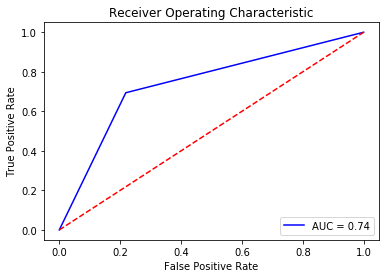

In [35]:
##Xg boost with the best parameters
#{'colsample_by_tree': 0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 80}


xgb_model = XGBClassifier(colsample_by_tree = 0 , n_estimators = 80
                          , gamma = 0.2 , learning_rate = 0.2 , 
                          max_depth = 4)


run_model(xgb_model , x_train , y_train , x_test , y_test)
xgb_cv_score = cross_val_score(xgb_model, x, y, cv=3, scoring='roc_auc')